In [9]:
from db.database import Database
db = Database()
import numpy as np
import pandas as pd
from util.text_manipulation import yake_preprocessing, get_leaf_values
import json

In [2]:
with db.engine.connect() as conn:
    bp_df = pd.read_sql_table("blueprints_filtered", conn)
_rel_topics = bp_df["topic_id"].unique().tolist()
topics = {topic.topic_id: topic for topic in db.get_topics()}
posts = {post.post_id: post for post in db.get_posts()}
posts_df = pd.DataFrame([{_attr: getattr(post, _attr) for _attr in post.__dict__.keys()
                        } for post in posts.values()])
topics_df = pd.DataFrame([{_attr: getattr(topic, _attr) for _attr in topic.__dict__.keys()
                        } for topic in topics.values()])
topics_df = topics_df[topics_df["topic_id"].isin(_rel_topics)]
posts_df = posts_df[posts_df["topic_id"].isin(_rel_topics)]

In [3]:
bp_df.head()

,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,blueprint_hash,id,name,extracted_keywords,keywords_yake,topic_title,topic_id,tags,created_at,post_content
0,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{""nag"": 0.66021433671546, ""prompt"": 0.23634566...","{""nag"": 0.66021433671546, ""prompt"": 0.23634566...",2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,1,Nag prompt blueprint,"{""input__input_boolean"": 2}","{""android"": 0.04282333988128355, ""user"": 0.042...",Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...
1,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.49695533075954657, ""lzw36"": 0.4...","{""inovelli"": 0.49695533075954657, ""lzw36"": 0.4...",ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,2,Inovelli,{},"{""inovelli"": 0.027025502281732554, ""create"": 0...",Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...
2,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{""button"": 0.47028047688169866, ""five"": 0.3549...","{""button"": 0.47028047688169866, ""five"": 0.3549...",c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,3,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","{""short"": 0.01649244354775234, ""long"": 0.01649...",deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community..."
3,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{""heat"": 0.3484675281776271, ""heating"": 0.3360...","{""heat"": 0.3484675281776271, ""heating"": 0.3360...",00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,4,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","{""set"": 0.055741499059047184, ""temperature"": 0...",Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the..."
4,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{""allotted"": 0.6330710810698282, ""allowance"": ...","{""allotted"": 0.6330710810698282, ""allowance"": ...",0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,5,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","{""time"": 0.11369206228658875, ""light"": 0.13453...",Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def plot_wordcloud(keywords):
    wordcloud = WordCloud().generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [5]:
import re

pattern = r"(?:input|output)__(?:input|output)_?(\w+)$"
def bp_keyword(kws: list[str]) -> list[str] | None:
    if kws is None:
        return None
    matches = [re.match(pattern, kw).__str__() for kw in kws]
    return matches

### Rake

In [6]:
from rake_nltk import Rake

rake = Rake()

def extract_keyphrases(text):
    rake.extract_keywords_from_text(text)
    return rake.get_ranked_phrases()

In [8]:
topic = topics_df.iloc[0]
bps_in_topic = bp_df[bp_df["topic_id"] == topic["topic_id"]]

print(bps_in_topic["extracted_keywords"].tolist())
bp_keyword(bps_in_topic["extracted_keywords"].tolist())

['{"input__input_boolean": 2}']


['None']

['works log say trigger missing hey potentially dumb question', 'phoscon interface suddenly deconz started sending double events', 'line 33 column 31 device_id input remote', 'phoscon either anyways perhaps helps someone else', 'runningcontrol anything using tradfri shortcut button remote', 'hands iam pretty busy atm', 'early stage cheers linton today', 'home assistant dev tools events listen', 'zha maybe 300ms delay peter', 'error error undefinederror dict object', 'deconz ikea tradfri shortcut buttonbased', 'ha via deconz next step', 'works perfectly thanks please help', 'shortcut buttons support double', 'delay fort short press', 'tell home assistant lists', 'home assistant hassiosupervised using', 'blueprint unknown tag input', 'far deconz already supports', 'code looks good thanks', 'ui add template paste', 'button works fine thanks', 'ikea tradfri shortcut button', 'fires dubbel events switch', 'new ikea tradfri', 'triggered events would', 'current deconz version', 'link thanks y

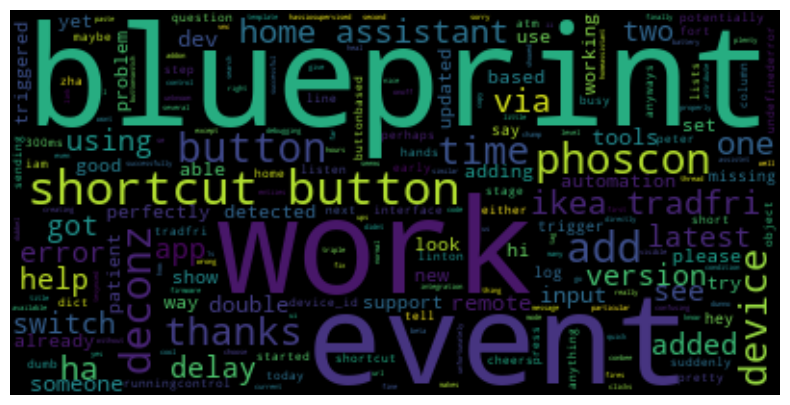

In [ ]:
topic = topics_df.iloc[115]
posts_in_topic = posts_df[posts_df["topic_id"] == topic["topic_id"]]
bps_in_topic = bp_df[bp_df["topic_id"] == topic["topic_id"]]

tags = topic["tags"]
keywords = bp_keyword(bps_in_topic["extracted_keywords"].tolist())
rake.stopwords = Rake().stopwords.union({"blueprint", "home assistant", "automation", topic["tags"], ""
                                         

text = yake_preprocessing(topic["title"])
text += " ".join([yake_preprocessing(post) for post in posts_in_topic["cooked"].tolist()])
text += " ".join([yake_preprocessing(bp) for bp in bps_in_topic["description"].tolist()])
keywords = extract_keyphrases(text)
print(keywords)
plot_wordcloud(keywords)

### Yake